In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


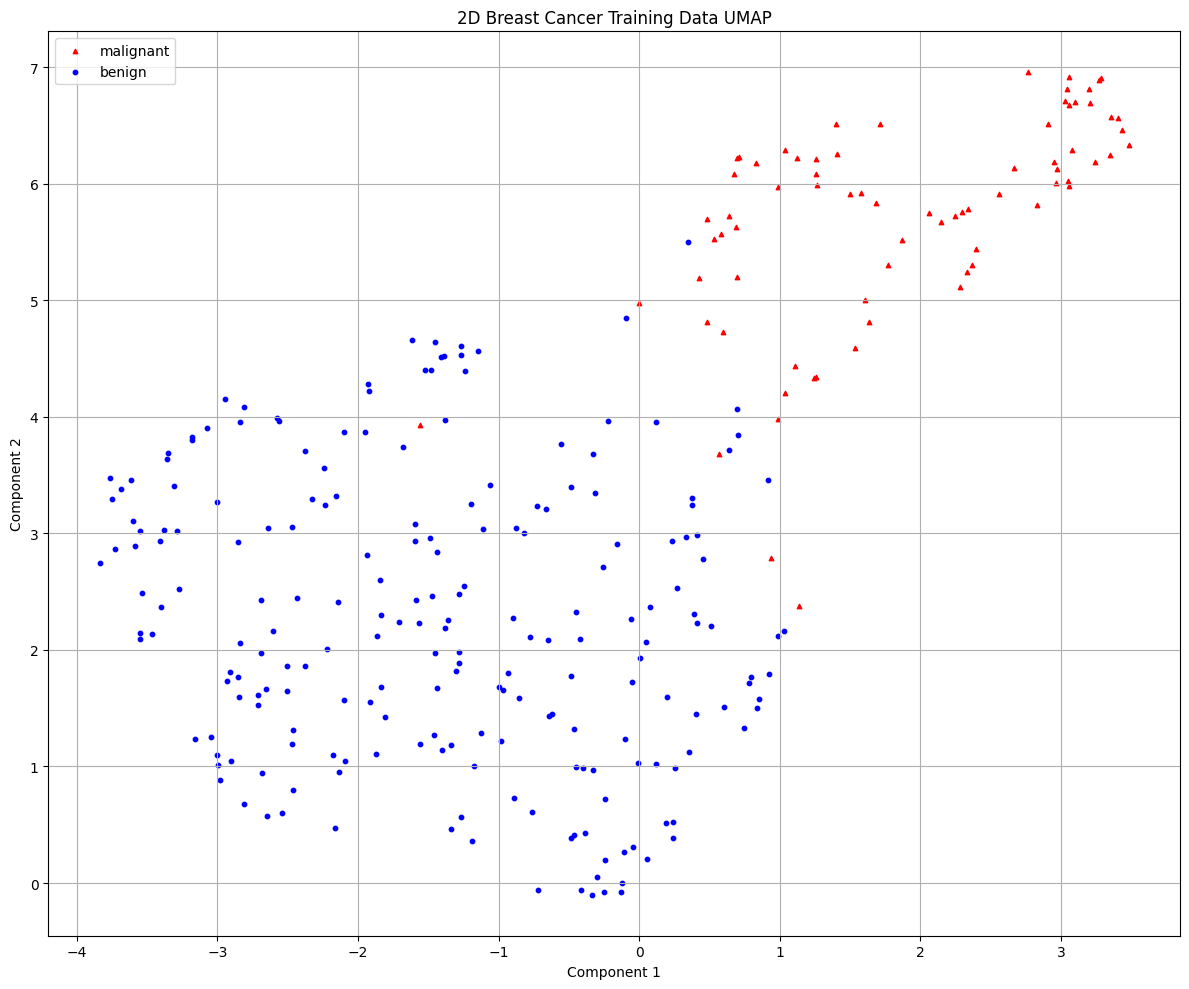

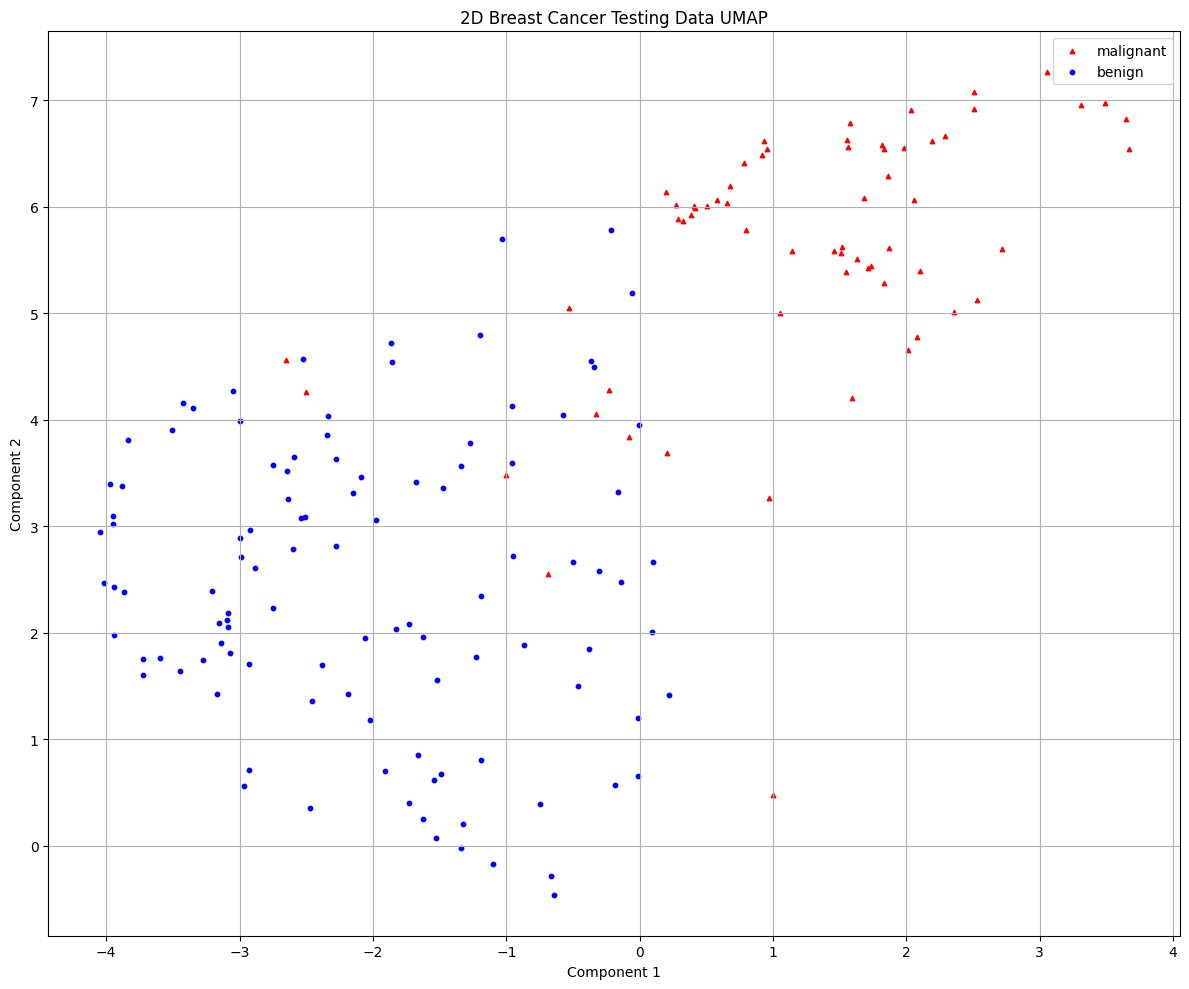

[I 2025-04-27 11:33:48,245] A new study created in memory with name: no-name-117bd365-2ac7-4556-8879-473c43d3c3b9
[I 2025-04-27 11:34:28,869] Trial 0 finished with value: 0.9825166364186328 and parameters: {'n_estimators': 6504, 'max_depth': 14, 'learning_rate': 0.04214028436943468, 'subsample': 0.5199388393072967, 'colsample_bytree': 0.8715763067490581, 'gamma': 4.461128638999538, 'reg_alpha': 2.7817501373284853e-08, 'reg_lambda': 6.8345894603072e-07}. Best is trial 0 with value: 0.9825166364186328.
[I 2025-04-27 11:34:40,326] Trial 1 finished with value: 0.9720508166969146 and parameters: {'n_estimators': 1413, 'max_depth': 5, 'learning_rate': 0.005073008510889281, 'subsample': 0.7459265945698464, 'colsample_bytree': 0.6710712685296978, 'gamma': 4.836230724490784, 'reg_alpha': 0.08614729276985769, 'reg_lambda': 5.812353619156178e-07}. Best is trial 0 with value: 0.9825166364186328.
[I 2025-04-27 11:35:13,457] Trial 2 finished with value: 0.9754990925589837 and parameters: {'n_estimat

Best trial:
Accuracy: 0.9826376285541439
Best hyperparameters:  {'n_estimators': 349, 'max_depth': 10, 'learning_rate': 0.020646238557360554, 'subsample': 0.5724132696001971, 'colsample_bytree': 0.861586239850168, 'gamma': 4.506376600261936, 'reg_alpha': 2.0744910923739593e-05, 'reg_lambda': 7.54058354699112e-08}


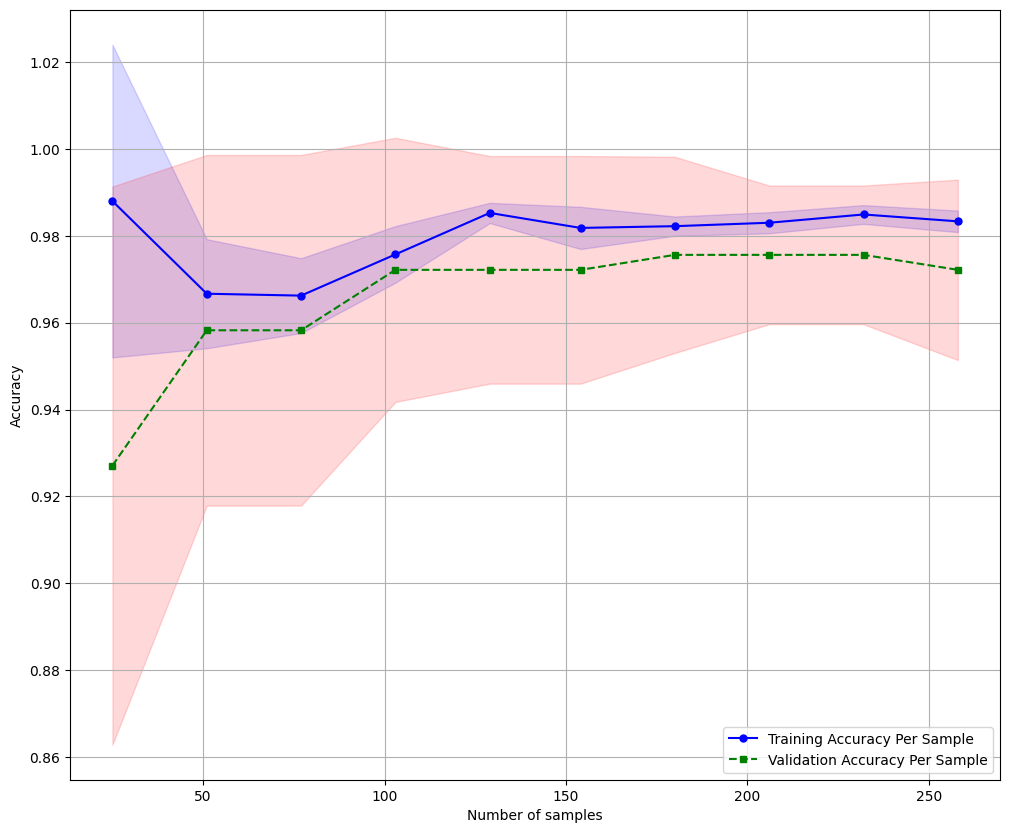

Confusion Matrix
[[ 48  16]
 [  0 107]]
Accuracy: 0.9064, Precision: 0.8699, Recall: 1.0000, F1: 0.9304, AUC: 0.9758


In [2]:
outlier_params = {'eps': 0.5, 'min_samples': 8, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'dbscan', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'umap', {})

helper.train_and_evaluate_model('xgb', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)